In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump

# Load the training data
data = pd.read_csv("ideathon_dataset.csv", parse_dates=["date"], dayfirst=False)  # Assuming MM/DD/YYYY format

# Select the commodity to predict
commodity = input("Enter the commodity to predict (onion/potato/tomato): ").strip().lower()
if commodity not in ["onion", "potato", "tomato"]:
    raise ValueError("Invalid commodity. Choose from: onion, potato, tomato")

# Separate features and target variable
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data["week"] = data["date"].dt.isocalendar().week
data[f"lag_1_{commodity}"] = data[commodity].shift(1)
data[f"rolling_mean_7_{commodity}"] = data[commodity].rolling(window=7).mean()
data.dropna(inplace=True)

features = ["year", "month", "week", f"lag_1_{commodity}", f"rolling_mean_7_{commodity}"]
target = commodity

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # Convert to percentage

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f} ({accuracy:.2f}% accuracy)")

# Predict future price
future_date = input("Enter a future date (MM/DD/YYYY): ")
future_date = pd.to_datetime(future_date, format="%m/%d/%Y")

future_features = pd.DataFrame({
    "year": [future_date.year],
    "month": [future_date.month],
    "week": [future_date.isocalendar().week],
    f"lag_1_{commodity}": [data[commodity].iloc[-1]],
    f"rolling_mean_7_{commodity}": [data[commodity].rolling(window=7).mean().iloc[-1]]
})

future_pred = model.predict(future_features)
print(f"Predicted {commodity.capitalize()} Price for {future_date.date()}: ₹{future_pred[0]:.2f}")

# Store the final trained model
model_filename = "final_price_prediction_model.joblib"
dump(model, model_filename)
print(f"Final trained model saved as '{model_filename}'")

ModuleNotFoundError: No module named 'pandas'

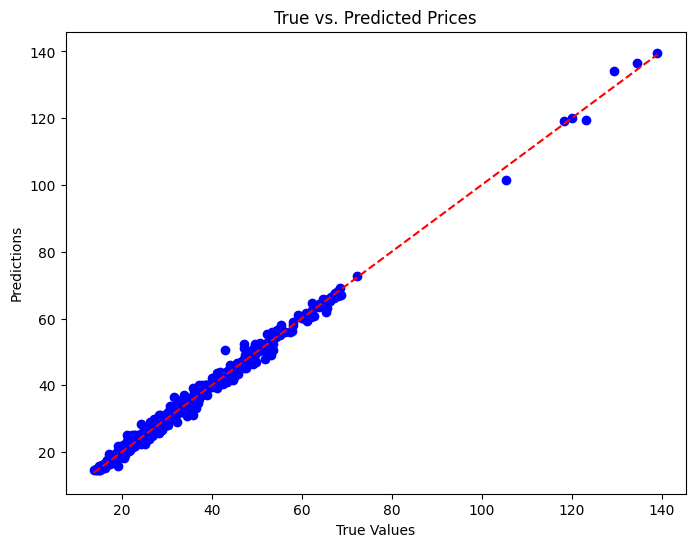

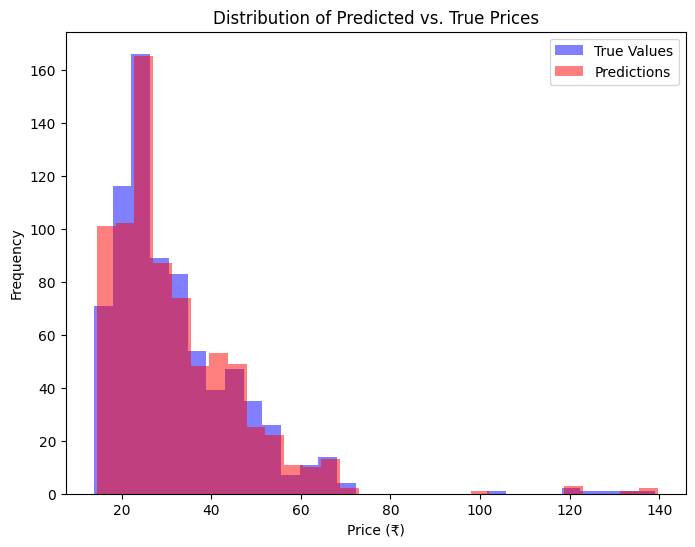

In [ ]:
# Plot predicted vs. true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Prices')
plt.show()

# Plot distribution of price predictions
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=30, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred, bins=30, alpha=0.5, color='red', label='Predictions')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs. True Prices')
plt.legend()
plt.show()



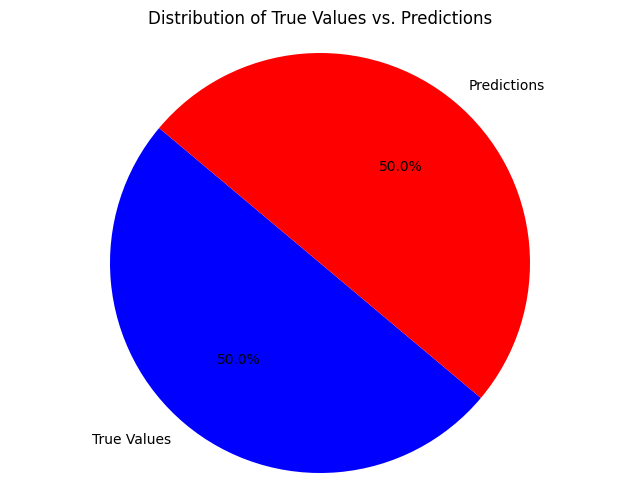

In [ ]:
# Plot distribution of actual vs. predicted values
plt.figure(figsize=(8, 6))
labels = ['True Values', 'Predictions']
colors = ['blue', 'red']
values = [len(y_test), len(y_pred)]
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of True Values vs. Predictions')
plt.axis('equal')
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump

# Load the training data
data = pd.read_csv("ideathon_dataset.csv", parse_dates=["date"], dayfirst=False)  # Assuming MM/DD/YYYY format

# Select the commodity to predict
commodity = input("Enter the commodity to predict (onion/potato/tomato): ").strip().lower()
if commodity not in ["onion", "potato", "tomato"]:
    raise ValueError("Invalid commodity. Choose from: onion, potato, tomato")

# Separate features and target variable
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data["week"] = data["date"].dt.isocalendar().week
data[f"lag_1_{commodity}"] = data[commodity].shift(1)
data[f"rolling_mean_7_{commodity}"] = data[commodity].rolling(window=7).mean()
data.dropna(inplace=True)

features = ["year", "month", "week", f"lag_1_{commodity}", f"rolling_mean_7_{commodity}"]
target = commodity

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # Convert to percentage

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f} ({accuracy:.2f}% accuracy)")

# Predict future price
future_date = input("Enter a future date (MM/DD/YYYY): ")
future_date = pd.to_datetime(future_date, format="%m/%d/%Y")

future_features = pd.DataFrame({
    "year": [future_date.year],
    "month": [future_date.month],
    "week": [future_date.isocalendar().week],
    f"lag_1_{commodity}": [data[commodity].iloc[-1]],
    f"rolling_mean_7_{commodity}": [data[commodity].rolling(window=7).mean().iloc[-1]]
})

future_pred = model.predict(future_features)
print(f"Predicted {commodity.capitalize()} Price for {future_date.date()}: ₹{future_pred[0]:.2f}")


Enter the commodity to predict (onion/potato/tomato): onion
Mean Squared Error: 0.74
R-squared: 1.00 (99.59% accuracy)
Enter a future date (MM/DD/YYYY): 07/24/2027
Predicted Onion Price for 2027-07-24: ₹37.06


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump

# Load the training data
data = pd.read_csv("ideathon_dataset.csv", parse_dates=["date"], dayfirst=False)  # Assuming MM/DD/YYYY format

# Select the commodity to predict
commodity = input("Enter the commodity to predict (onion/potato/tomato): ").strip().lower()
if commodity not in ["onion", "potato", "tomato"]:
    raise ValueError("Invalid commodity. Choose from: onion, potato, tomato")

# Separate features and target variable
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data["week"] = data["date"].dt.isocalendar().week
data[f"lag_1_{commodity}"] = data[commodity].shift(1)
data[f"rolling_mean_7_{commodity}"] = data[commodity].rolling(window=7).mean()
data.dropna(inplace=True)

features = ["year", "month", "week", f"lag_1_{commodity}", f"rolling_mean_7_{commodity}"]
target = commodity

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # Convert to percentage

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f} ({accuracy:.2f}% accuracy)")

# Predict future price
future_date = input("Enter a future date (MM/DD/YYYY): ")
future_date = pd.to_datetime(future_date, format="%m/%d/%Y")

future_features = pd.DataFrame({
    "year": [future_date.year],
    "month": [future_date.month],
    "week": [future_date.isocalendar().week],
    f"lag_1_{commodity}": [data[commodity].iloc[-1]],
    f"rolling_mean_7_{commodity}": [data[commodity].rolling(window=7).mean().iloc[-1]]
})

future_pred = model.predict(future_features)
print(f"Predicted {commodity.capitalize()} Price for {future_date.date()}: ₹{future_pred[0]:.2f}")


Enter the commodity to predict (onion/potato/tomato): potato
Mean Squared Error: 0.35
R-squared: 0.99 (99.18% accuracy)
Enter a future date (MM/DD/YYYY): 05/03/2028
Predicted Potato Price for 2028-05-03: ₹24.60
